## Support Vector Machine

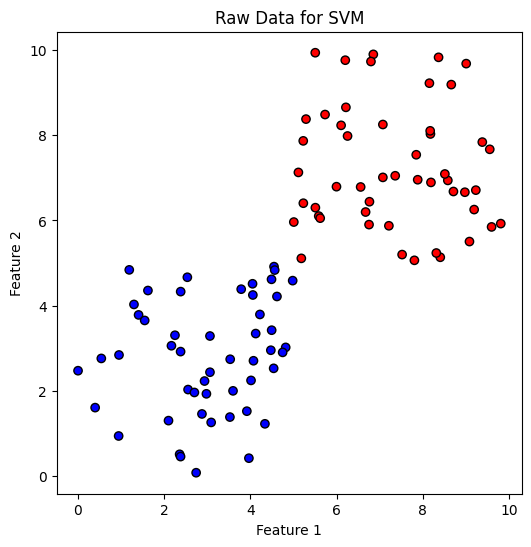

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(0)
cluster_0 = [(random.uniform(0, 5),   random.uniform(0, 5))   for _ in range(50)]
cluster_1 = [(random.uniform(5, 10),  random.uniform(5, 10))  for _ in range(50)]
X = cluster_0 + cluster_1
y = [ -1 ] * 50 + [ +1 ] * 50 

plt.figure(figsize=(6,6))
plt.scatter([p[0] for p in X], [p[1] for p in X], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Raw Data for SVM')
plt.show()

In [2]:
data = list(zip(X, y))
random.shuffle(data)
split_idx = int(0.75 * len(data))
train_data = data[:split_idx]
test_data  = data[split_idx:]

X_train, y_train = zip(*train_data)
X_test,  y_test  = zip(*test_data)

In [4]:
class SupportVectorMachine:
    
    def __init__(self, learning_rate=0.01, reg_strength=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.n_iterations = n_iterations
        
        self.weights = [0.0, 0.0]
        self.bias = 0.0

    def fit(self, X_train, y_train):
       for _ in range(self.n_iterations):
            for features, label in zip(X_train, y_train):
                x1, x2 = features
                
                margin = label * (self.weights[0]*x1 + self.weights[1]*x2 + self.bias)

                if margin < 1:
                    self.weights[0] -= self.learning_rate * (self.reg_strength * self.weights[0] - label * x1)
                    self.weights[1] -= self.learning_rate * (self.reg_strength * self.weights[1] - label * x2)
                    self.bias       -= self.learning_rate * (-label)
                else:
                    self.weights[0] -= self.learning_rate * (self.reg_strength * self.weights[0])
                    self.weights[1] -= self.learning_rate * (self.reg_strength * self.weights[1])
                    
    def _decision_function(self, point):
        x1, x2 = point
        return self.weights[0]*x1 + self.weights[1]*x2 + self.bias

    def predict(self, X):
        predictions = []
        for point in X:
            score = self._decision_function(point)
            predicted_label = 1 if score >= 0 else -1
            predictions.append(predicted_label)
        return predictions

In [11]:
model = SupportVectorMachine(
    learning_rate=0.01,
    reg_strength=0.01,
    n_iterations=200
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

num_correct = 0
for true_label, pred_label in zip(y_test, y_pred):
    if true_label == pred_label:
        num_correct += 1

accuracy = num_correct / len(y_test)
print(f"Test Accuracy: {accuracy:.2%}")

print(f"Learned weights: {model.weights}")
print(f"Learned bias   : {model.bias:.4f}")

Test Accuracy: 100.00%
Learned weights: [0.5478362128664067, 0.7229863498398952]
Learned bias   : -6.4600


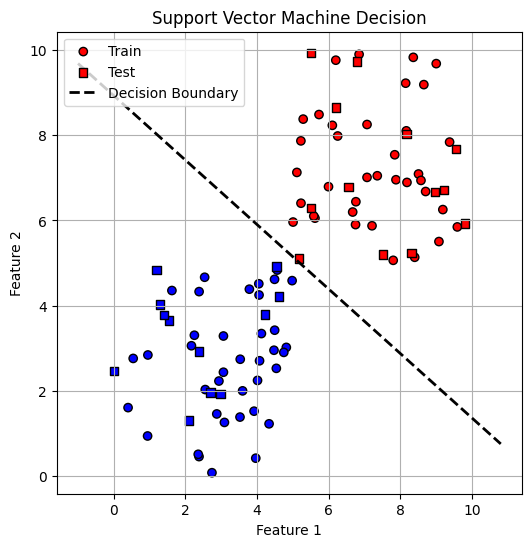

In [15]:
plt.figure(figsize=(6, 6))

train_x = [pt[0] for pt in X_train]
train_y = [pt[1] for pt in X_train]
plt.scatter(train_x, train_y, c=y_train, cmap='bwr', edgecolors='k', label='Train')

test_x = [pt[0] for pt in X_test]
test_y = [pt[1] for pt in X_test]
plt.scatter(test_x, test_y, c=y_test, cmap='bwr', marker='s', edgecolors='k', label='Test')

x_min, x_max = min(pt[0] for pt in X) - 1, max(pt[0] for pt in X) + 1
boundary_x = [x_min, x_max]
boundary_y = [
    -(model.weights[0] / model.weights[1]) * x - (model.bias / model.weights[1])
    for x in boundary_x
]

plt.plot(boundary_x, boundary_y, linestyle='--', color='k', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine Decision')
plt.legend()
plt.grid(True)
plt.show()

### What we have understood:

According to the code of class SupportVectorMachine(), SVM aims to find the best decision boundary (hyperplane) that maximizes the margin between two classes:
That boundary is defined by: `w·x + b = 0`

Where:

- `w` is the weight vector (direction of separation)
- `x` is the input vector
- `b` is the bias (offset from origin)

##### The margin is the distance between this hyperplane and the closest data points (called support vectors).
##### During training, the algorithm adjusts w and b so that the support vectors are as far apart as possible — while still keeping most points on the correct side.
##### This is the core idea behind the "maximum margin classifier", even if some points violate it slightly (soft margin).